In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df_products=pd.read_csv("zepto_products.csv")
df_sales=pd.read_csv("zepto_sales.csv")

# Display basic information of sales data.

In [47]:
df_sales.info() #from here i can see it has null values in 3 columns i.e city, delivery_status, delivery_time_mins

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220220 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            220220 non-null  int64  
 1   order_date          220220 non-null  object 
 2   product_id          220220 non-null  int64  
 3   quantity            220220 non-null  int64  
 4   city                219118 non-null  object 
 5   delivery_status     219118 non-null  object 
 6   customer_id         220220 non-null  int64  
 7   delivery_time_mins  215817 non-null  float64
 8   total_amount        220220 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 15.1+ MB


In [48]:
df_sales.describe()

,order_id,product_id,quantity,customer_id,delivery_time_mins,total_amount
count,220220.000000,220220.000000,220220.000000,220220.000000,215817.000000,220220.000000
mean,152325.652429,119.214218,1.548633,60016.100023,26.006246,302.336515
std,30172.200347,12.097782,1.003054,5781.447441,10.670646,324.031767
min,100001.000000,101.000000,1.000000,50000.000000,8.000000,23.250000
25%,126144.000000,109.000000,1.000000,55019.000000,17.000000,82.460000
50%,152444.500000,118.000000,1.000000,60019.000000,26.000000,226.870000
75%,178447.250000,134.000000,2.000000,65020.000000,35.000000,390.590000
max,204476.000000,138.000000,5.000000,69999.000000,44.000000,2656.850000


In [49]:
df_sales.shape

(220220, 9)

In [50]:
df_sales.head()

,order_id,order_date,product_id,quantity,city,delivery_status,customer_id,delivery_time_mins,total_amount
0,151992,2024-02-08 00:38:00,135,1,Bangalore,Delivered,66921,28.0,182.49
1,109440,2024-05-31 15:49:00,102,1,Mumbai,Delivered,66646,38.0,23.25
2,126862,2024-01-17 23:41:00,110,1,Mumbai,Delivered,69586,12.0,60.43
3,167258,2024-11-12 09:42:00,121,3,Hyderabad,Delivered,66719,12.0,996.12
4,159614,2024-01-02 17:50:00,112,4,Bangalore,Delivered,50094,38.0,907.48


In [51]:
df_sales.tail()

,order_id,order_date,product_id,quantity,city,delivery_status,customer_id,delivery_time_mins,total_amount
220215,204348,2024-04-08 00:51:00,112,2,Mumbai,Delivered,53512,18.0,453.74
220216,139692,2024-04-14 13:19:00,135,1,Bangalore,Delivered,60871,13.0,182.49
220217,155920,2024-11-22 13:49:00,110,1,Bangalore,Delivered,66690,19.0,60.43
220218,100568,2024-07-13 22:50:00,129,1,Bangalore,Delivered,61300,14.0,531.37
220219,195258,2024-07-30 11:27:00,112,1,Delhi,Delivered,63759,15.0,226.87


# Display basic information of products data.

In [52]:
df_products.shape

(38, 4)

In [53]:
df_products.info() #here no null values is there.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    38 non-null     int64  
 1   product_name  38 non-null     object 
 2   category      38 non-null     object 
 3   base_price    38 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [54]:
df_products.describe()

,product_id,base_price
count,38.000000,38.000000
mean,119.500000,211.414474
std,11.113055,139.411328
min,101.000000,23.250000
25%,110.250000,105.307500
50%,119.500000,188.005000
75%,128.750000,290.127500
max,138.000000,531.370000


In [55]:
df_products.head()

,product_id,product_name,category,base_price
0,101,Apple,Fruits & Vegetables,103.13
1,102,Banana,Fruits & Vegetables,23.25
2,103,Onion,Fruits & Vegetables,55.75
3,104,Potato,Fruits & Vegetables,49.02
4,105,Tomato,Fruits & Vegetables,115.74


In [56]:
df_products.tail()

,product_id,product_name,category,base_price
33,134,Handwash,Personal Care,390.59
34,135,Toothpaste,Personal Care,182.49
35,136,Soap Bar,Personal Care,243.21
36,137,Face Wash,Personal Care,340.29
37,138,Sanitary Pads,Personal Care,266.48


# Handling missing values and null values.

In [57]:
# here we are going to drop/remove null rows in city and deilvery_status.

In [58]:
df_sales.isnull().sum()

order_id                 0
order_date               0
product_id               0
quantity                 0
city                  1102
delivery_status       1102
customer_id              0
delivery_time_mins    4403
total_amount             0
dtype: int64

In [59]:
df_sales.dropna(subset=['city','delivery_status'],inplace=True)
df_sales[['city','delivery_status']].isnull().sum()

city               0
delivery_status    0
dtype: int64

In [60]:
mean_time = df_sales['delivery_time_mins'].mean()
mean_time

np.float64(26.008306969430354)

In [61]:
df_sales['delivery_time_mins'].fillna(mean_time,inplace=True)
df_sales[['delivery_time_mins']].isnull().mean()

delivery_time_mins    0.0
dtype: float64

In [62]:
df_sales.isnull().sum()

order_id              0
order_date            0
product_id            0
quantity              0
city                  0
delivery_status       0
customer_id           0
delivery_time_mins    0
total_amount          0
dtype: int64

In [63]:
df_products.isnull().sum()

product_id      0
product_name    0
category        0
base_price      0
dtype: int64

In [64]:
df_sales.shape

(218022, 9)

In [65]:
df_sales.duplicated().sum()

np.int64(216)

In [66]:
df_sales.drop_duplicates(inplace=True)

In [67]:
df_sales.shape

(217806, 9)

In [68]:
df_sales.info() # from here we can see order date datatype is object which we will change in date format.

<class 'pandas.core.frame.DataFrame'>
Index: 217806 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            217806 non-null  int64  
 1   order_date          217806 non-null  object 
 2   product_id          217806 non-null  int64  
 3   quantity            217806 non-null  int64  
 4   city                217806 non-null  object 
 5   delivery_status     217806 non-null  object 
 6   customer_id         217806 non-null  int64  
 7   delivery_time_mins  217806 non-null  float64
 8   total_amount        217806 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 16.6+ MB


In [69]:
df_sales['order_date']=pd.to_datetime(df_sales['order_date'])
df_sales[['order_date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 217806 entries, 0 to 220219
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_date  217806 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


# So our dataset is clean with no missing or null valus and with no duplicates in it.

# Data analysis aggregation and grouping.

In [70]:
print(df_products.info())
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    38 non-null     int64  
 1   product_name  38 non-null     object 
 2   category      38 non-null     object 
 3   base_price    38 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 217806 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   order_id            217806 non-null  int64         
 1   order_date          217806 non-null  datetime64[ns]
 2   product_id          217806 non-null  int64         
 3   quantity            217806 non-null  int64         
 4   city                217806 non-null  object        
 5   delivery_status     217806 non-null  object        
 6   custome

In [71]:
min_amount = df_sales["total_amount"].min()
max_amount = df_sales["total_amount"].max()
avg_amount = df_sales["total_amount"].mean()

In [72]:
print(f"\nMin Total Amount: {min_amount}")
print(f"Max Total Amount: {max_amount}")
print(f"Average Total Amount: {avg_amount}")


Min Total Amount: 23.25
Max Total Amount: 2656.85
Average Total Amount: 302.3239065039531


In [73]:
top_products = df_sales.groupby("product_id")["total_amount"].sum().nlargest(5)

In [74]:
print(top_products)

product_id
134    11658720.91
112     7908234.46
135     6171994.29
129     4796676.99
131     4716913.11
Name: total_amount, dtype: float64


In [75]:
top_products_details = top_products.reset_index().merge(df_products,on="product_id")

In [76]:
print(top_products_details)

   product_id  total_amount   product_name              category  base_price
0         134   11658720.91       Handwash         Personal Care      390.59
1         112    7908234.46    Paneer 200g          Dairy & Eggs      226.87
2         135    6171994.29     Toothpaste         Personal Care      182.49
3         129    4796676.99  Detergent 1kg  Household Essentials      531.37
4         131    4716913.11   Toilet Paper  Household Essentials      513.21


In [77]:
sales_by_city = df_sales.groupby("city")["total_amount"].sum().sort_values(ascending=False) #it will give all city vs toatl amount calculation.
print(sales_by_city)

city
Mumbai       23063075.50
Bangalore    16385777.49
Delhi         9937151.01
Hyderabad     5305224.53
Pune          4559465.47
Kolkata       2671042.99
Chennai       2563667.49
Ahmedabad     1362556.30
Name: total_amount, dtype: float64


In [78]:
avg_delivery_time = df_sales.groupby("city")["delivery_time_mins"].mean().sort_values(ascending=True)
print(avg_delivery_time)

city
Hyderabad    25.914055
Mumbai       25.979052
Bangalore    26.015561
Delhi        26.037475
Pune         26.040857
Chennai      26.059007
Kolkata      26.089218
Ahmedabad    26.170095
Name: delivery_time_mins, dtype: float64


In [79]:
# sales trend over time. #monthly sales. #our data has only yeaof 2024 data.
df_sales["month"] = df_sales["order_date"].dt.to_period("M")
monthly_sales = df_sales.groupby("month")["total_amount"].sum().sort_values(ascending=False)
print(monthly_sales)

month
2024-12    5690458.23
2024-01    5593297.49
2024-05    5574801.37
2024-03    5569350.76
2024-10    5547622.90
2024-07    5523114.55
2024-08    5468629.63
2024-11    5451878.37
2024-09    5386353.65
2024-06    5380702.74
2024-04    5375568.99
2024-02    5286182.10
Freq: M, Name: total_amount, dtype: float64


In [80]:
# Sales by product category
sales_by_category = df_sales.merge(df_products, on="product_id") #here we have merged 2 dataframe in new one.
sales_by_category = sales_by_category.groupby("category")["total_amount"].sum().sort_values(ascending=False)
print(sales_by_category)

category
Personal Care           23399215.51
Dairy & Eggs            12344371.12
Household Essentials    11975638.84
Munchies                 8083367.83
Beverages                6598799.13
Fruits & Vegetables      3446568.35
Name: total_amount, dtype: float64


# Data visualization.

In [81]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\970871140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_name", y="total_amount", data=top_products_details, palette="rocket")


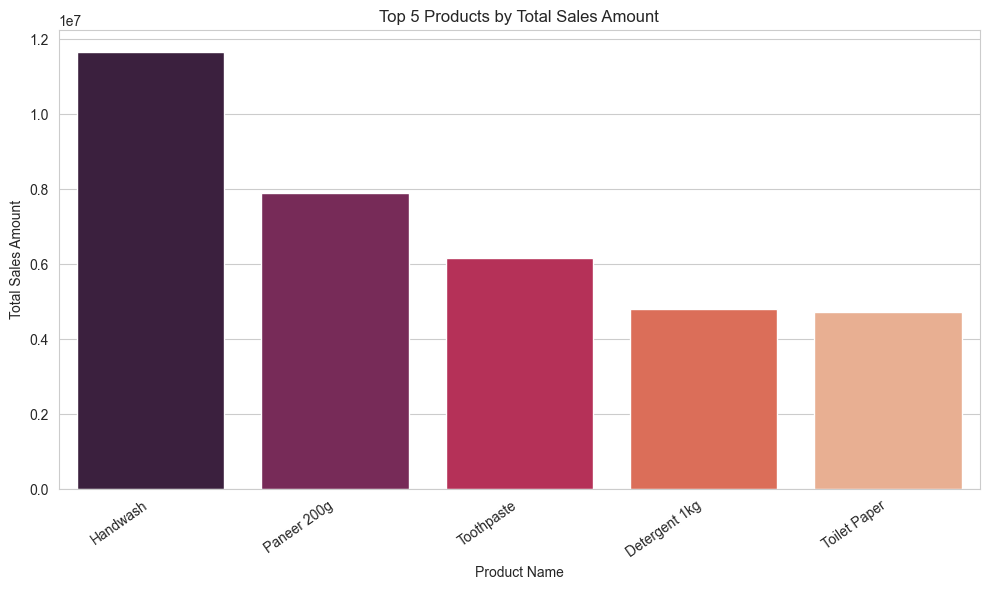

In [82]:
# Plot 1: Top 5 Products by Sales Amount
sns.barplot(x="product_name", y="total_amount", data=top_products_details, palette="rocket")
plt.title("Top 5 Products by Total Sales Amount")
plt.xlabel("Product Name")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\2832155291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="flare")


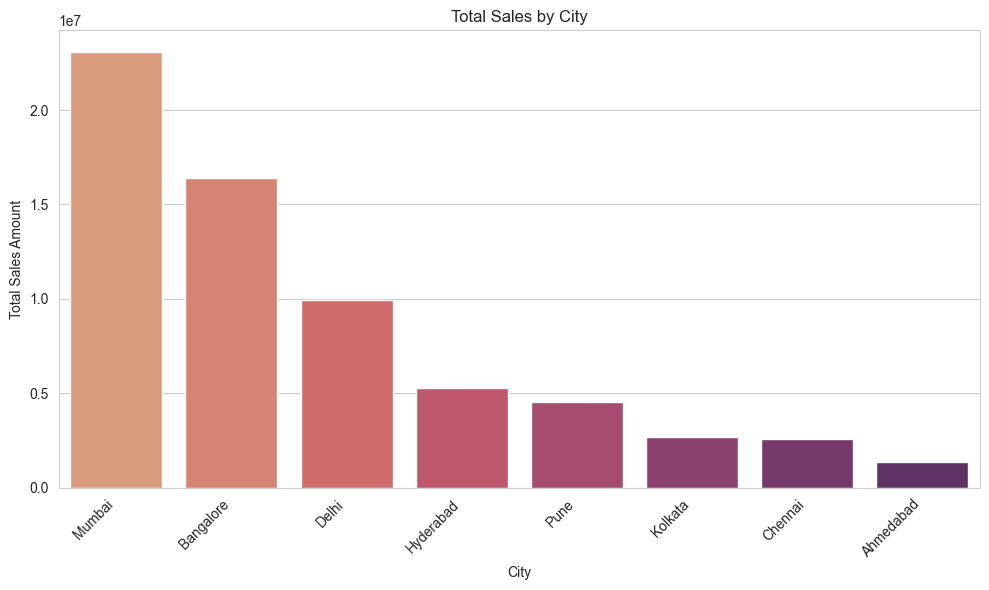

In [83]:
#Plot 2: Total Sales by City #plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="flare")
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

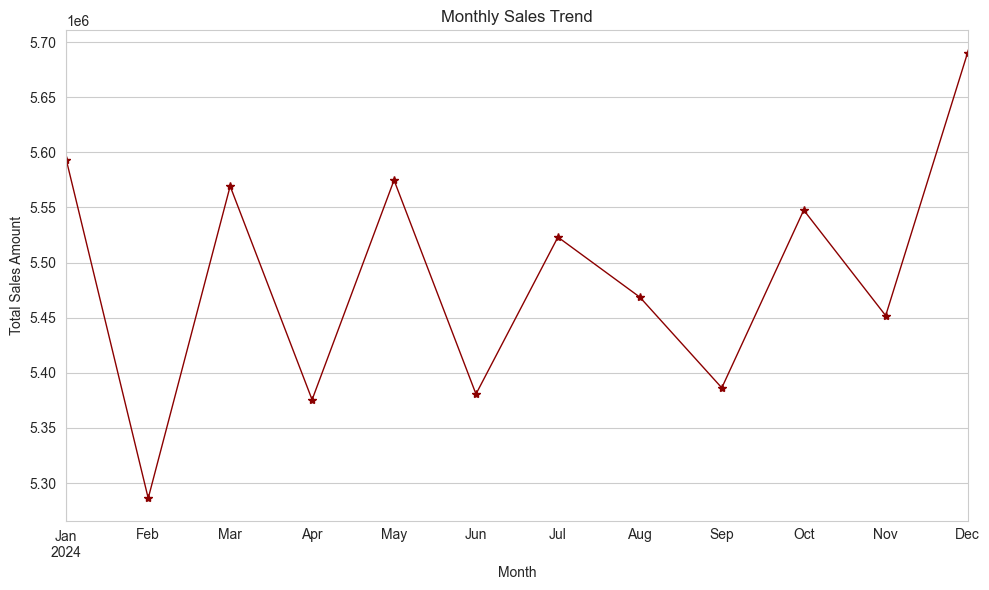

In [118]:
monthly_sales.sort_index().plot(kind="line", marker="*", linewidth=1, color="darkred")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

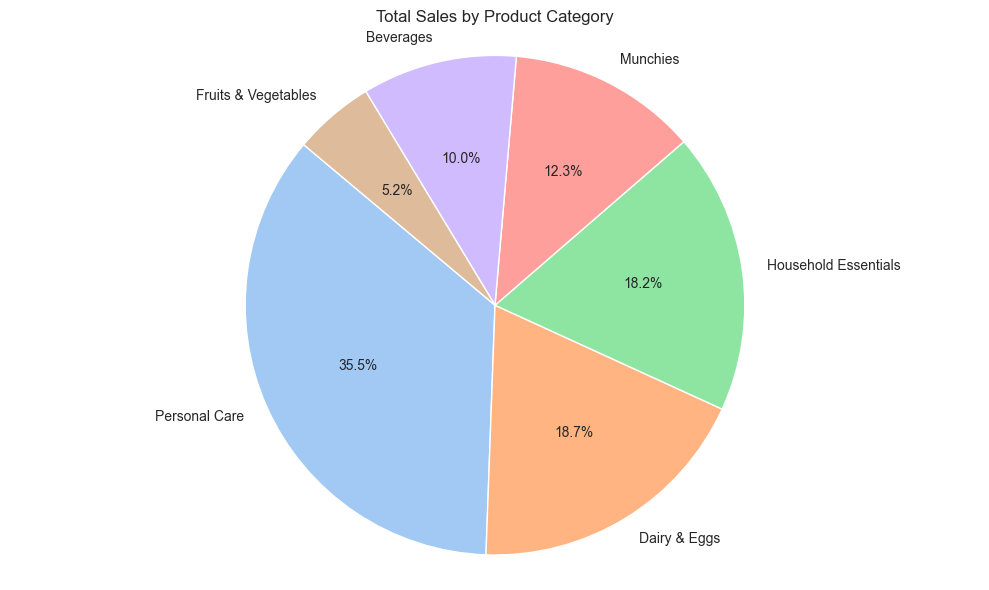

In [85]:
# Plot 4: Sales by Product Category (Pie Chart)
plt.pie(sales_by_category, labels=sales_by_category.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Total Sales by Product Category")
plt.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\1027858648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


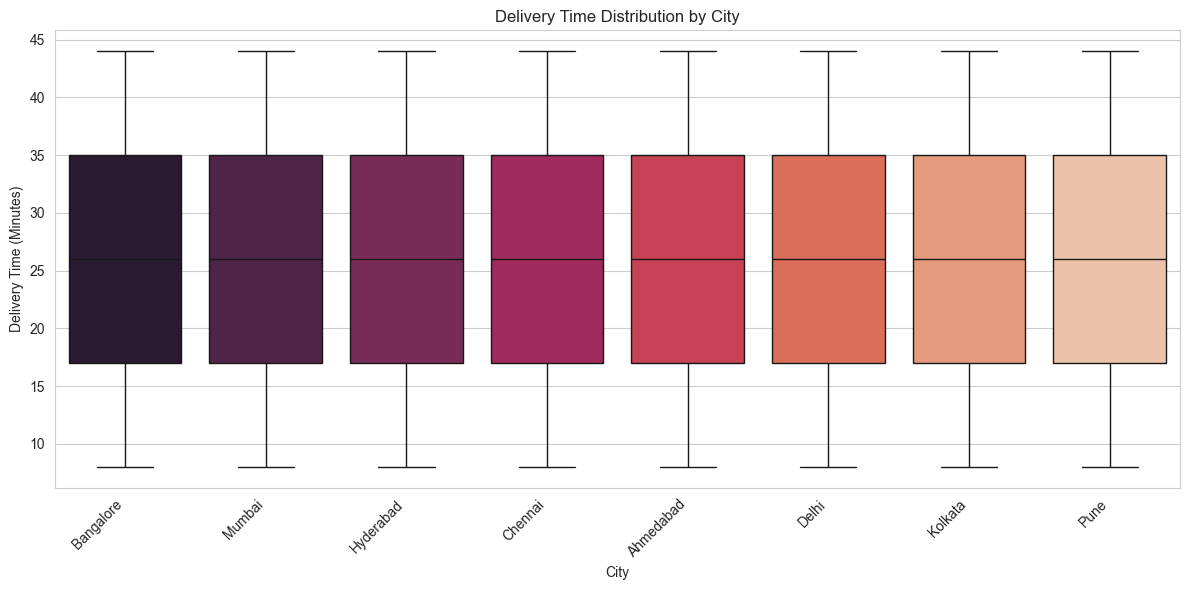

In [86]:
# Plot 5: Distribution of Delivery Times
delivered_orders = df_sales[df_sales["delivery_status"] == "Delivered"]
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="city",
    y="delivery_time_mins",
    data=delivered_orders,
    palette="rocket"
)

plt.title("Delivery Time Distribution by City")
plt.xlabel("City")
plt.ylabel("Delivery Time (Minutes)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# As heatmap runs on matrix we are creating matrix data.
city_sales = df_sales.pivot_table(
    index="city",
    values="total_amount",
    aggfunc="sum"
)

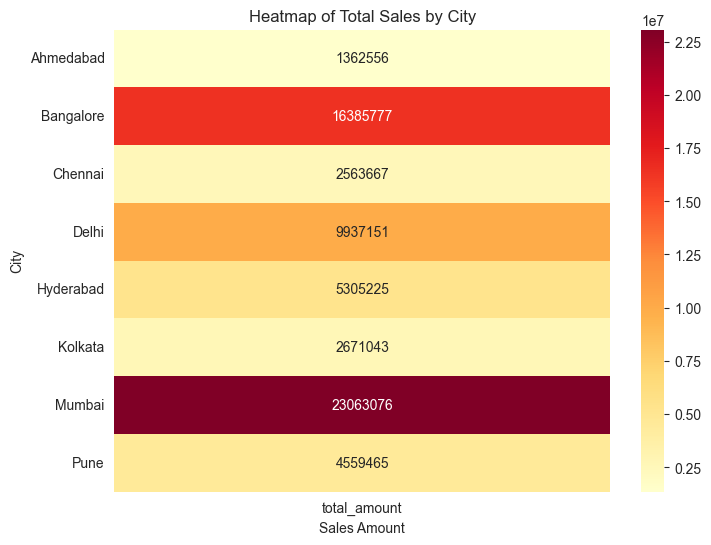

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    city_sales,
    annot=True,        # show numbers
    fmt=".0f",         # remove decimals
    cmap="YlOrRd"      # color theme
)

plt.title("Heatmap of Total Sales by City")
plt.xlabel("Sales Amount")
plt.ylabel("City")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\325739799.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_name", y="total_amount", data=top_products_details, palette="rocket",ax=axes[0, 0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\325739799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="flare",ax=axes[0,1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\325739799.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="city",y="delivery_time_mins",data=

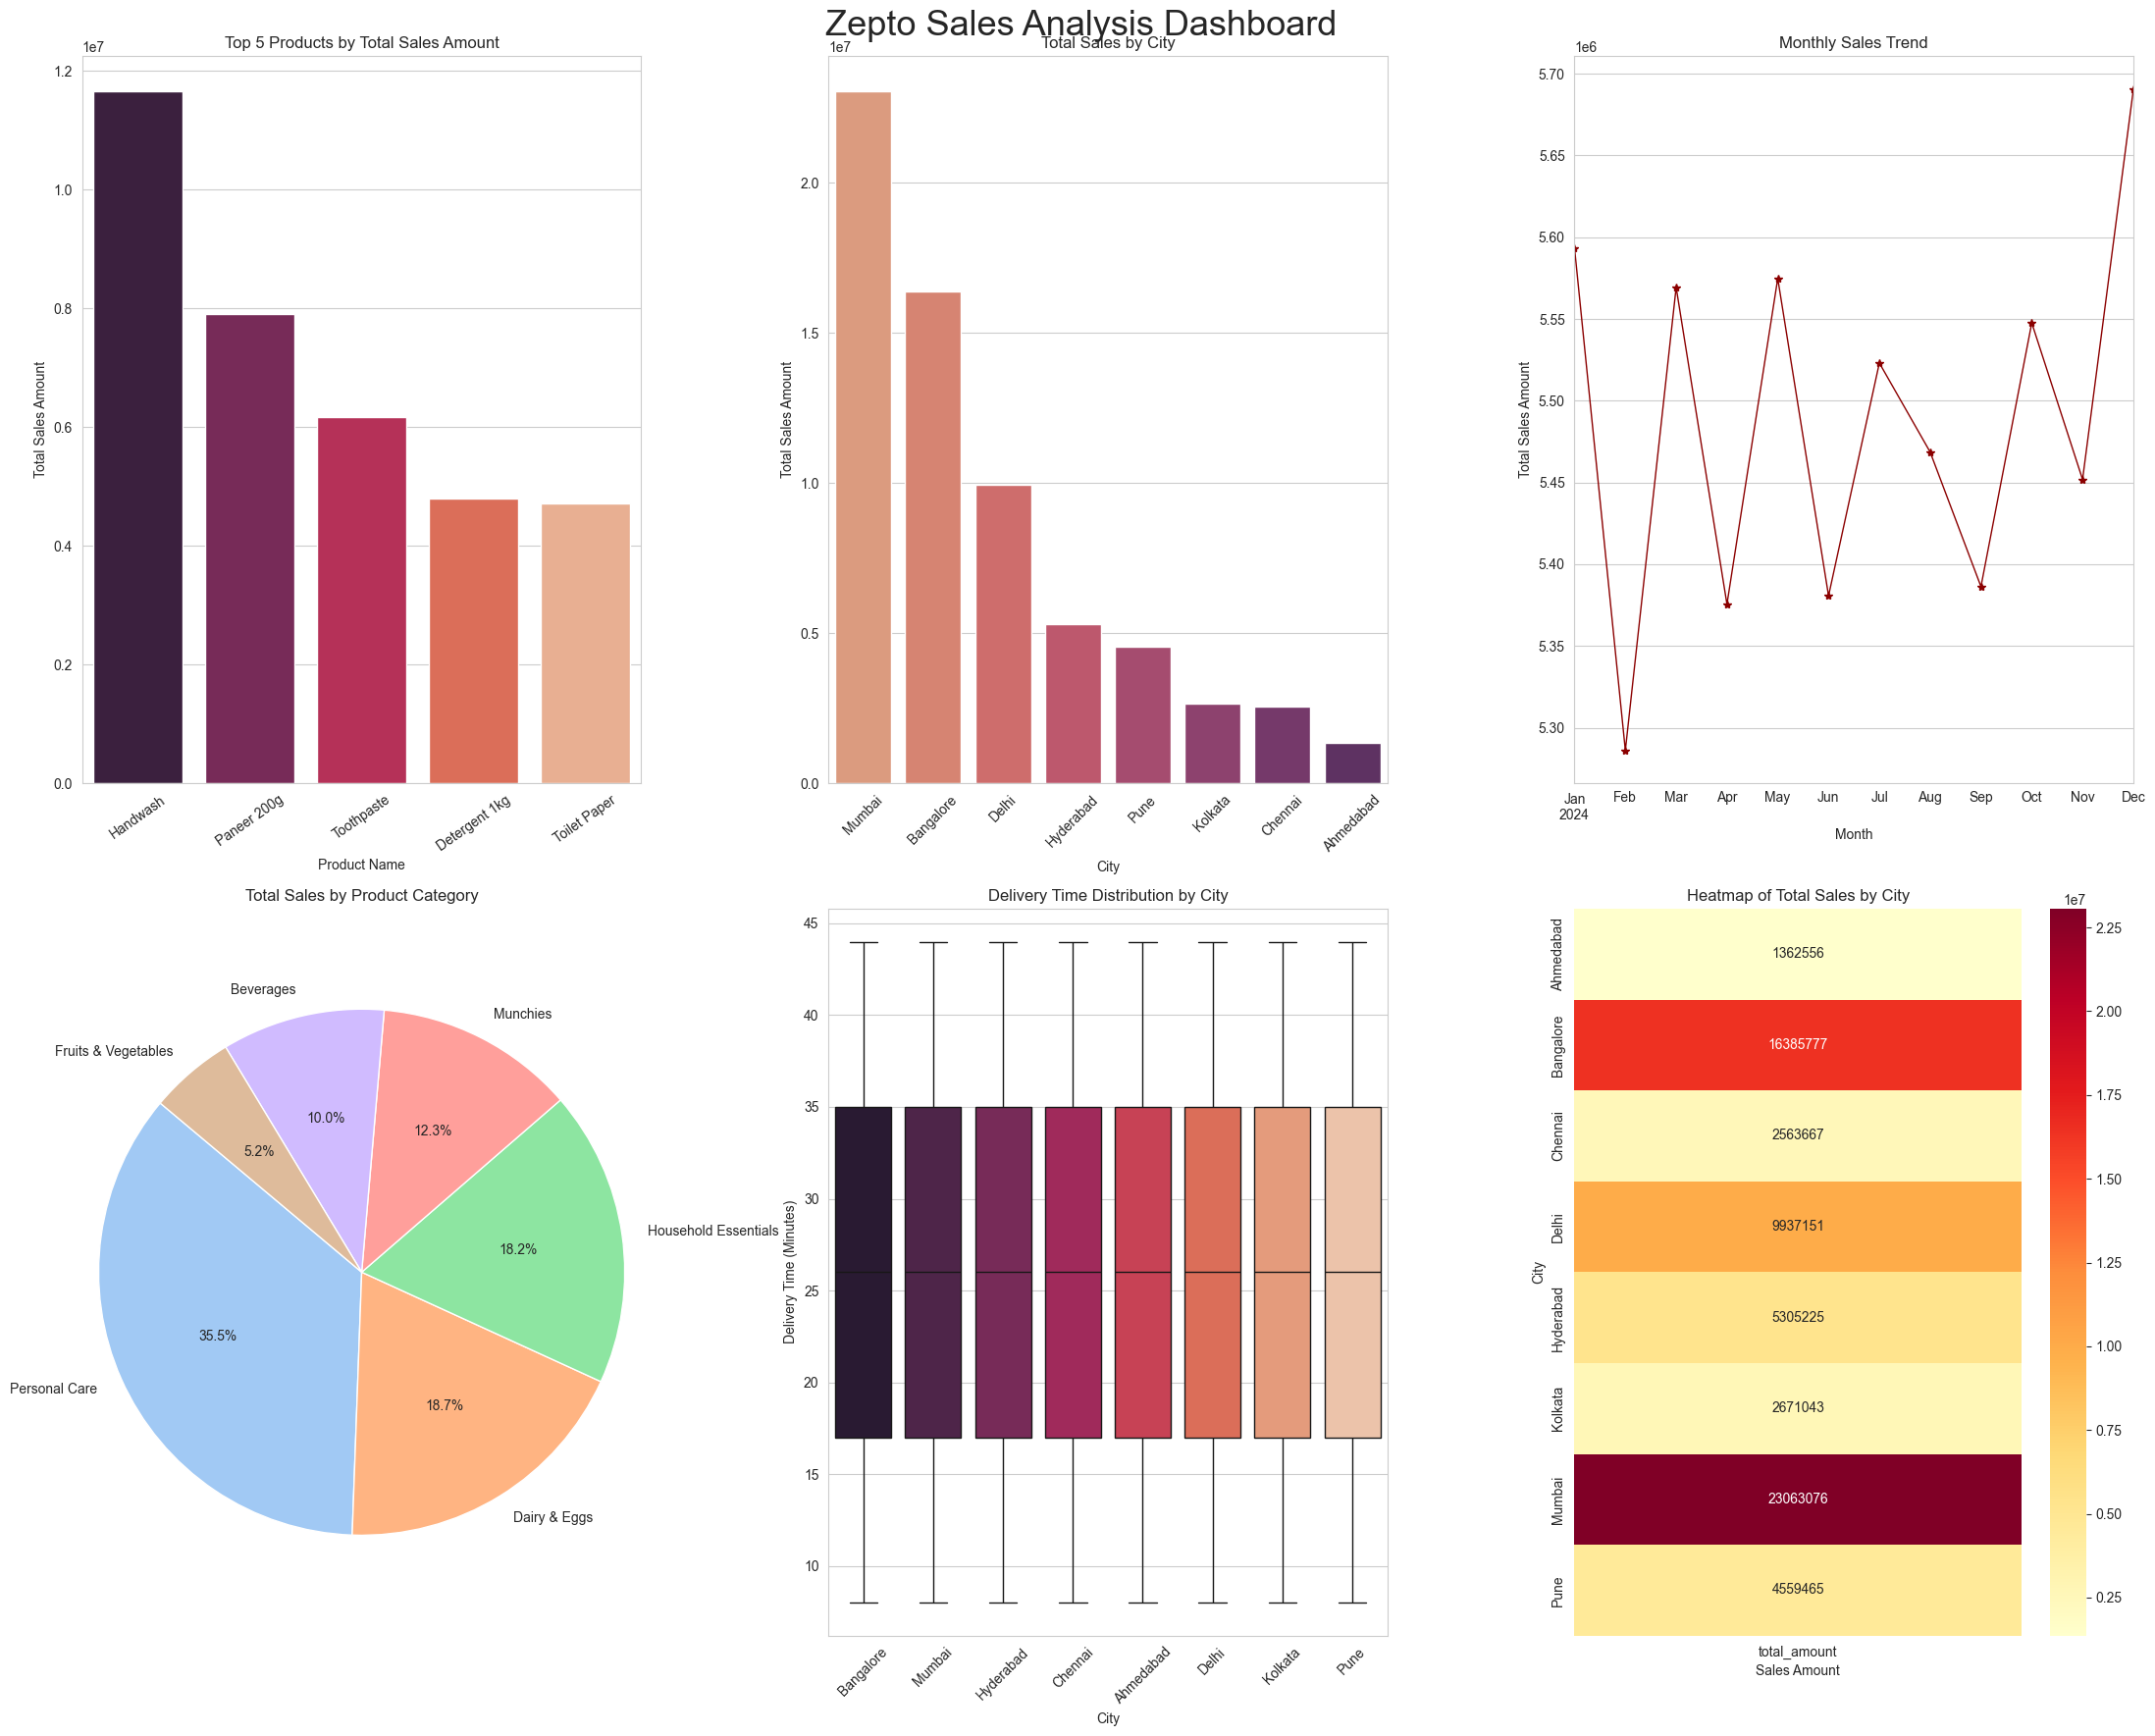

In [119]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2,3, figsize=(22, 18))
fig.suptitle("Zepto Sales Analysis Dashboard", fontsize=26)

# Plot 1: Top 5 Products by Sales Amount
sns.barplot(x="product_name", y="total_amount", data=top_products_details, palette="rocket",ax=axes[0, 0])
axes[0, 0].set_title("Top 5 Products by Total Sales Amount")
axes[0, 0].set_xlabel("Product Name")
axes[0, 0].set_ylabel("Total Sales Amount")
axes[0, 0].tick_params(axis='x', rotation=35)

#Plot 2: Total Sales by City #plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="flare",ax=axes[0,1])
axes[0, 1].set_title("Total Sales by City")
axes[0, 1].set_xlabel("City")
axes[0, 1].set_ylabel("Total Sales Amount")
axes[0, 1].tick_params(axis='x',rotation=45)

#Plot 3: Monthly Sales Trend
monthly_sales.sort_index().plot(kind="line", marker="*", linewidth=1, color="darkred",ax=axes[0,2])
axes[0, 2].set_title("Monthly Sales Trend")
axes[0, 2].set_xlabel("Month")
axes[0, 2].set_ylabel("Total Sales Amount")
plt.grid(True)

# Plot 4: Sales by Product Category (Pie Chart)
axes[1, 0].pie(sales_by_category, labels=sales_by_category.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
axes[1, 0].set_title("Total Sales by Product Category")
axes[1, 0].axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 5: Distribution of Delivery Times
sns.boxplot(x="city",y="delivery_time_mins",data=delivered_orders,palette="rocket",ax=axes[1,1])

axes[1,1].set_title("Delivery Time Distribution by City")
axes[1,1].set_xlabel("City")
axes[1,1].set_ylabel("Delivery Time (Minutes)")
axes[1,1].tick_params(axis='x',rotation=45)

# Plot 6: city and sales using heat map.

sns.heatmap(city_sales,annot=True,fmt=".0f",cmap="YlOrRd",ax=axes[1,2])

axes[1,2].set_title("Heatmap of Total Sales by City")
axes[1,2].set_xlabel("Sales Amount")
axes[1,2].set_ylabel("City")

fig.tight_layout()
plt.show()